# E-commerce shipping data analysis Part 2
## Explanatory Analysis


## `Investigation Overview`
- In this investigation i want to reveal the patterns and trends in the data in order to help the E-commerce company make data driven decisions

## `Data Overview`
- The data contains different attributes related to an international E-commerce shipping company, it consists of 10999 observations and 12 variables including: Id number of customers, gender of customer, cost of the product, mode of shipment, and customer rating and others.
- Data Link on kaggle: https://www.kaggle.com/prachi13/customer-analytics?select=Train.csv




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('Train.csv')

## Distribution of products prices

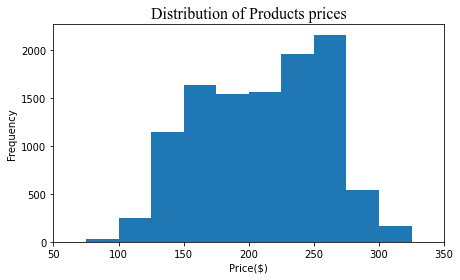

In [2]:
plt.figure(figsize=[7,4])
bins=np.arange(0,df['Cost_of_the_Product'].max()+25,25)
plt.hist(df['Cost_of_the_Product'],bins=bins);
plt.title('Distribution of Products prices',fontname='Times new roman',fontsize=16);
plt.xlim((50,350))
plt.ylabel('Frequency');
plt.xlabel('Price($)');

In [3]:
df['Cost_of_the_Product'].min()

96

In [4]:
df['Cost_of_the_Product'].max()

310

###  The prices of products vary from 96 usd for the product to 310 usd, but the prices of products that have the highest sales records are between 225 usd and 275 usd

## Distribution of products weight

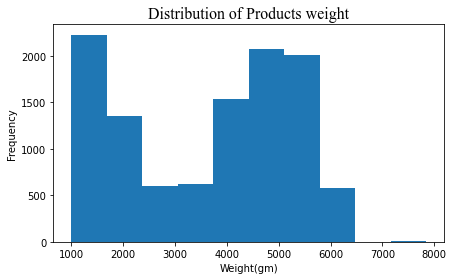

In [11]:
plt.figure(figsize=[7,4])
plt.hist(df['Weight_in_gms']);
plt.title('Distribution of Products weight',fontname='Times new roman',fontsize=16);
#plt.xlim((50,350))
plt.ylabel('Frequency');
plt.xlabel('Weight(gm)');

### The distribution of the weight is bimodal, we can see that the most frequent product weights are between 1000 gm to 1500 gm followed by weights that range from 4500 gm up to 5500 gm, and there is an outlier that is in between 7000 gm and 8000 gm

## Proportion of each gender in our customers

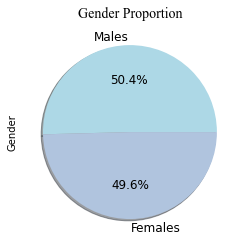

In [12]:
plt.figure(figsize=[7,4])

my_colors = ['lightblue','lightsteelblue']
my_explode = (0, 0)
df['Gender'].value_counts(normalize=True).plot(kind='pie',labels=['Males','Females'],
                                                           fontsize=12,autopct='%1.1f%%', startangle=0, shadow = True,colors=my_colors
                                                           ,explode=my_explode);
plt.title('Gender Proportion',fontname='Times new roman',fontsize=14);

### Number of males is almost equal to number of females in our customers

## Which shipping method is commonly used ?

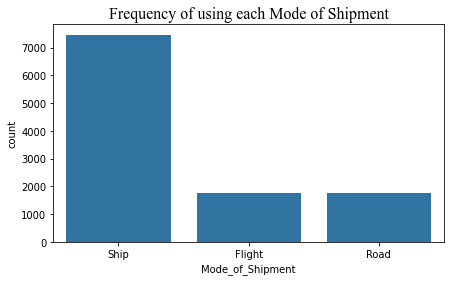

In [13]:
plt.figure(figsize=[7,4])
base_color=sns.color_palette()[0]
ship_order=df['Mode_of_Shipment'].value_counts().index
sns.countplot(data=df,x='Mode_of_Shipment',color=base_color,order=ship_order)
plt.title('Frequency of using each Mode of Shipment',fontname='Times new roman',fontsize=16);

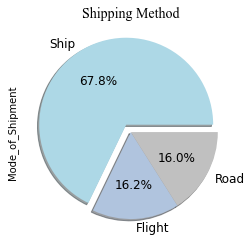

In [14]:
plt.figure(figsize=[7,4])

my_colors = ['lightblue','lightsteelblue','silver']
my_explode = (0.1, 0,0)
df['Mode_of_Shipment'].value_counts(normalize=True).plot(kind='pie',
                                                           fontsize=12,autopct='%1.1f%%', startangle=0, shadow = True,colors=my_colors
                                                           ,explode=my_explode);
plt.title('Shipping Method',fontname='Times new roman',fontsize=14);

### The most frequent mode of shipping is  ship, both flight and road has equal share.

## What is the shipping method that has the highest rate of delievering products on time ?

Text(0.5, 1.0, 'Rate of shipping on time for different modes of shipment')

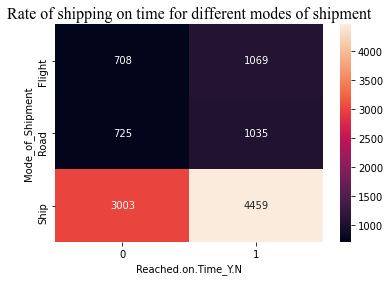

In [15]:
ct_counts=df.groupby(['Mode_of_Shipment','Reached.on.Time_Y.N']).size()

ct_counts=ct_counts.reset_index(name='count')
ct_counts=ct_counts.pivot(index='Mode_of_Shipment',columns='Reached.on.Time_Y.N',values='count')

sns.heatmap(ct_counts,annot=True,fmt='d');
plt.title('Rate of shipping on time for different modes of shipment',fontname='Times new roman',fontsize=16)

### Despite that ship is the most common used mode of shipment, it doesn't have the highest rate of delievering the products on time, but the differences between each mode of shipment is small, so maybe there is another reason  behind using it, maybe it's cost of shipping is less than others, but we don't have data in this dataset to prove it

- Percentage of shipments that reached on time using Flight 60 %

- Percentage of shipments that reached on time using Ship 59.7 %

- Percentage of shipments that reached on time using Road 58.8 %

## What is the proportion of shippings that was delievered on time ?

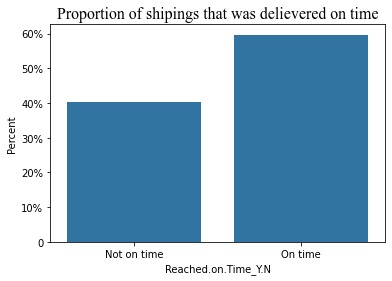

In [16]:
ax = sns.barplot(x="Reached.on.Time_Y.N", y='Reached.on.Time_Y.N', data=df, estimator=lambda x: len(x) / len(df) * 100,color=base_color)
ax.set(ylabel="Percent")
plt.title('Proportion of shipings that was delievered on time',fontname='Times new roman',fontsize=16)
plt.yticks([0,10,20,30,40,50,60],['0','10%','20%','30%','40%','50%','60%']);
plt.xticks([0,1],['Not on time','On time']);

### 60% of the shipments were delieverd on time.

## What is the relationship between gender, product importance and discount offered ?

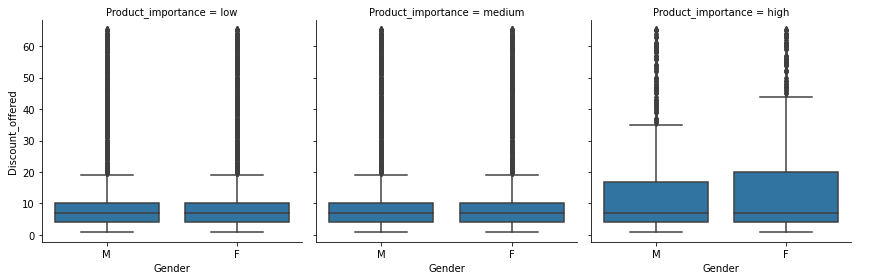

In [34]:
g=sns.FacetGrid(data=df,col='Product_importance',height=4)
g=g.map(sns.boxplot,'Gender','Discount_offered',order=['M','F']);
g.add_legend();

### Products with high importance tend to have higher discount, and in this product category women tend to have higher discounts than men

## In terms of product quality, which category has the highest sales count ?

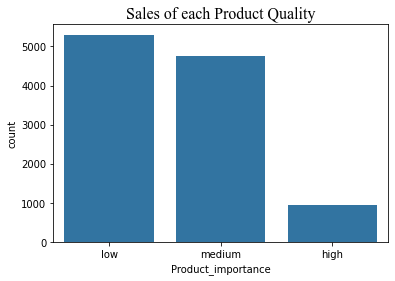

In [66]:
sns.countplot(data=df,x='Product_importance',color=base_color)
plt.title('Sales of each Product Quality',fontname='Times new roman',fontsize=16);

### Low quality products sell the most followed by medium quality and high quality products are far less than them in terms of sales

## In terms of product quality, which category has the highest sales ?

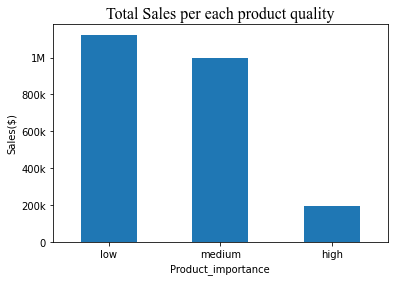

In [55]:
df.groupby('Product_importance')['Cost_of_the_Product'].sum().sort_values(ascending=False).plot(kind='bar');
plt.title('Total Sales per each product quality',fontname='Times new roman',fontsize=16);
plt.yticks([0.0*1e6,0.2*1e6,0.4*1e6,0.6*1e6,0.8*1e6,1.0*1e6],['0','200k','400k','600k','800k','1M']);
plt.ylabel('Sales($)');
plt.xticks(rotation=0);

### Sales of low quality products exceed 1 Million usd, sales of medium quality products is almost 1 Million usd, while sales of high quality products are below 200k usd

## What is the relationship between product quality, gender and total sales ?

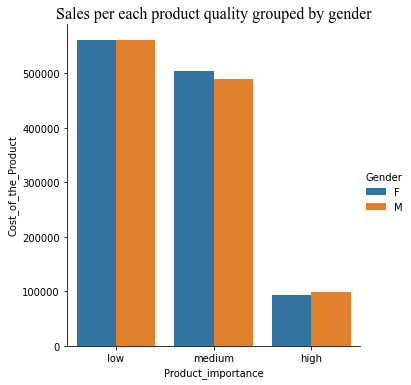

In [45]:
sns.catplot(x="Product_importance", y='Cost_of_the_Product',hue='Gender' , data=df, kind="bar",ci=None,estimator=sum);
plt.title('Sales per each product quality grouped by gender',fontname='Times new roman',fontsize=16);

### Women buy more medium quality products than men and men buy more high quality products than women

## In terms of product quality, which category has the highest on time delievry rate ?

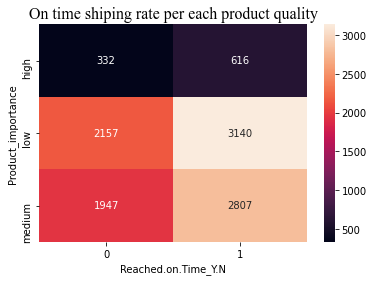

In [57]:
ct_counts=df.groupby(['Product_importance','Reached.on.Time_Y.N']).size()
ct_counts=ct_counts.reset_index(name='count')
ct_counts=ct_counts.pivot(index='Product_importance',columns='Reached.on.Time_Y.N',values='count')
sns.heatmap(ct_counts,annot=True,fmt='d');
plt.title('On time shiping rate per each product quality',fontname='Times new roman',fontsize=16);

In [64]:
print('High:',616/(616+332))
print('Low:',3140/(3140+2157))
print('med:',2807/(2807+1947))

High: 0.6497890295358649
Low: 0.5927883707759108
med: 0.5904501472444258


### High quality products have the highest on time shiping rate 

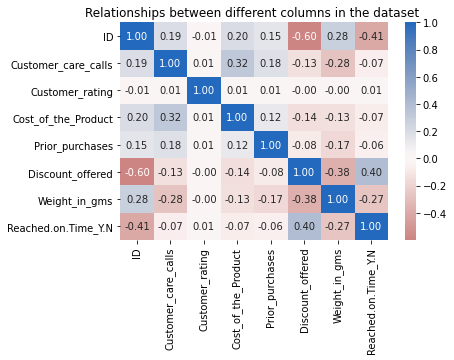

In [18]:
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='vlag_r',center=0);
plt.title('Relationships between different columns in the dataset ');